0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93


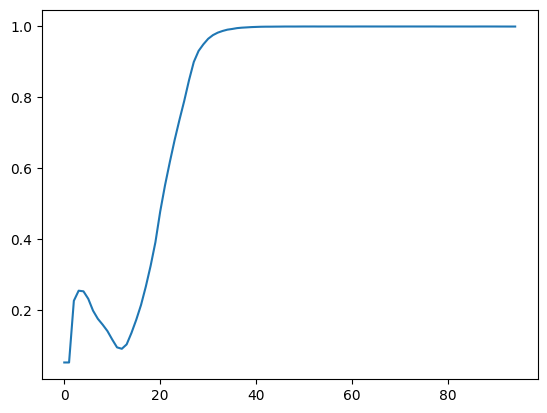

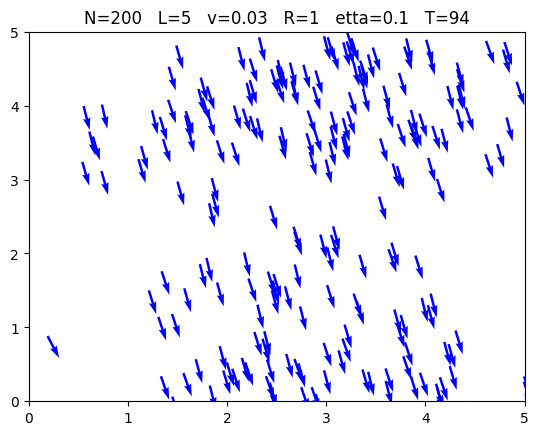

In [29]:
import numpy as np
import random as rd
import secrets as st
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
import math

# =============================================================================
# simulation
# =============================================================================
time_step = 1
def initialize() :
    global N, L, x_positions, y_positions, directions, order_parameters
    x_positions = [ [rd.uniform(0, L) for _ in range(N)] ]
    y_positions = [ [rd.uniform(0, L) for _ in range(N)] ]
    directions = [ [rd.uniform(0, 2*np.pi) for _ in range(N)] ]

    #order parameter
    v_xs = np.cos(directions[-1])
    v_ys = np.sin(directions[-1])
    order_parameter = ( np.mean(v_xs)**2 + np.mean(v_ys)**2 )**0.5
    order_parameters = [order_parameter]

def update() :
    global R, v, etta, new_xs, new_ys, new_dirs, order_parameter
    xs = x_positions[-1]
    ys = y_positions[-1]
    v_xs = v*np.cos(directions[-1])
    v_ys = v*np.sin(directions[-1])
    #positions update
    new_xs = [ (xs[n] + time_step*v_xs[n])%L for n in range(N) ]
    new_ys = [ (ys[n] + time_step*v_ys[n])%L for n in range(N) ]
    #direction update
    new_dirs = []
    for n in range(N) :
        n_neighbors_vx = []
        n_neighbors_vy = []
        for j in range(N) :
            dx = min( xs[n]-xs[j], L-(xs[n]-xs[j]) )
            dy = min( ys[n]-ys[j], L-(ys[n]-ys[j]) )
            if (dx**2 + dy**2)**0.5 < R :
                n_neighbors_vx.append(v_xs[j])
                n_neighbors_vy.append(v_ys[j])
        n_neighbors_mean_vx = np.mean(n_neighbors_vx)
        n_neighbors_mean_vy = np.mean(n_neighbors_vy)
        if not n_neighbors_mean_vx == 0 :
          new_dir = math.atan2( n_neighbors_mean_vy, n_neighbors_mean_vx ) + rd.uniform(-etta/2, etta/2)
        new_dirs.append(new_dir)
    #order parameter
    v_xs = np.cos(directions[-1])
    v_ys = np.sin(directions[-1])
    order_parameter = ( np.mean(v_xs)**2 + np.mean(v_ys)**2 )**0.5

def observe() :
  x_positions.append(new_xs)
  y_positions.append(new_ys)
  directions.append(new_dirs)
  order_parameters.append(order_parameter)

# =============================================================================
# running
# =============================================================================
N = 200
L = 5
v = 0.03
R = 1
etta = 0.1

def run_simulation() :
  global T
  update()
  observe()
  print(T)
  T+=1

T = 0
initialize()
for _ in range(10) :
  run_simulation()

while True :
  run_simulation()
  List = order_parameters[-10:]
  if ( max(List) - min(List) ) < 0.01 :
    break

for _ in range(10) :
  run_simulation()
  List = order_parameters[-10:]
  if ( max(List) - min(List) ) < 0.01 :
    break

for _ in range(50) :
  run_simulation()

plt.plot([t for t in range(len(order_parameters))], order_parameters)
plt.show()

# =============================================================================
# animation
# =============================================================================
# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)
quiver = ax.quiver(x_positions[0], y_positions[0],
    np.cos(directions[0]), np.sin(directions[0]),
    color='blue', scale=20, width=0.005)

def update0(frame):
    quiver.set_offsets(np.column_stack((x_positions[frame], y_positions[frame])))
    quiver.set_UVC(np.cos(directions[frame]), np.sin(directions[frame]))
    return quiver,

ani = FuncAnimation(fig, update0, frames=T, interval=300, blit=True)
ax.set_title(f"N={N}   L={L}   v={v}   R={R}   etta={etta}   T={T}")
ani.save("animation_Vicsek.mp4")

In [23]:
print([rd.uniform(0, 2*np.pi) for _ in range(100)])

[0.16955135621398307, 5.214446234649736, 1.64648539188245, 0.2799979379055828, 1.3274473983569655, 3.044858108635633, 5.235227669830261, 0.5110400706094695, 4.461376770511107, 0.26121031969354347, 2.547926525815437, 0.9825600025116595, 2.721068261219256, 2.7364725505238647, 5.295961460187139, 4.062043039552968, 1.598673962150769, 3.9803786665022534, 0.7679577569532999, 2.8361044360670564, 0.6622262868364734, 5.565377719291236, 4.4525180608492425, 5.627747868757689, 1.0141846942382877, 4.807872719264009, 1.2323692250507379, 3.750024876079016, 4.375777960406331, 5.262047986019798, 3.74599134250503, 3.9003167172056035, 2.2620517247586602, 0.8656590056403222, 2.766824661696464, 4.880233059629417, 2.96391493973081, 0.8913703672393342, 2.6256588923613493, 4.485108194320689, 4.343034197697153, 0.07009877762621276, 2.6741509347824173, 3.938961520814498, 4.014413123327551, 3.8889565207397423, 0.6197013287749111, 4.8155437162471815, 5.6635201843086875, 5.848413296223761, 5.77321692445, 3.2141262